# Import Tides from Historical Archive

Each CSV file in the Archive Folder is filtered just to keep the information about the following measure: http://environment.data.gov.uk/flood-monitoring/id/measures/0006-level-tidal_level-i-15_min-mAOD.

This measure defines the tidal level at the Westminster tidal station (encoded as 0006) or at the Tower Pier tidal station (encoded as 0007), measured relative to Ordance Survey datum in mAOD every 15 minutes.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tides Dataset Preprocessing

### Specify Paths

In [2]:
data_folder = os.path.join("..", "data")

archive_folder = os.path.join(data_folder, "historical_archive")

tide_folder = os.path.join(data_folder, "tide")

### Filter Archive

In [3]:
measure_west = "http://environment.data.gov.uk/flood-monitoring/id/measures/0006-level-tidal_level-i-15_min-mAOD"
measure_tower = "http://environment.data.gov.uk/flood-monitoring/id/measures/0007-level-tidal_level-i-15_min-mAOD"

In [4]:
tides_west_df = pd.DataFrame()

for file in os.listdir(archive_folder):
    df = pd.read_csv(
        os.path.join(archive_folder, file), parse_dates=["dateTime"]
    )
    filtered_df = df[df["measure"] == measure_west]
    tides_west_df = pd.concat([tides_west_df, filtered_df])

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_70512/545462138.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


KeyboardInterrupt: 

In [ ]:
tides_tower_df = pd.DataFrame()

for file in os.listdir(archive_folder):
    df = pd.read_csv(
        os.path.join(archive_folder, file), parse_dates=["dateTime"]
    )
    filtered_df = df[df["measure"] == measure_tower]
    tides_tower_df = pd.concat([tides_tower_df, filtered_df])

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_10400/1583720866.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(
/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_10400/1583720866.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(
/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_10400/1583720866.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(
/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_10400/1583720866.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(
/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_10400/1583720866.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.

# Inspect Westminster Dataset

In [ ]:
tides_west_df.set_index("dateTime", inplace=True)
tides_west_df.sort_index(inplace=True)

In [ ]:
tides_west_df.drop(columns=["Unnamed: 0", "measure"], inplace=True)

In [ ]:
tides_west_df["value"] = tides_west_df["value"].apply(
    lambda x: x.split("|")[0] if isinstance(x, str) and "|" in x else float(x)
)

<Axes: xlabel='dateTime', ylabel='value'>

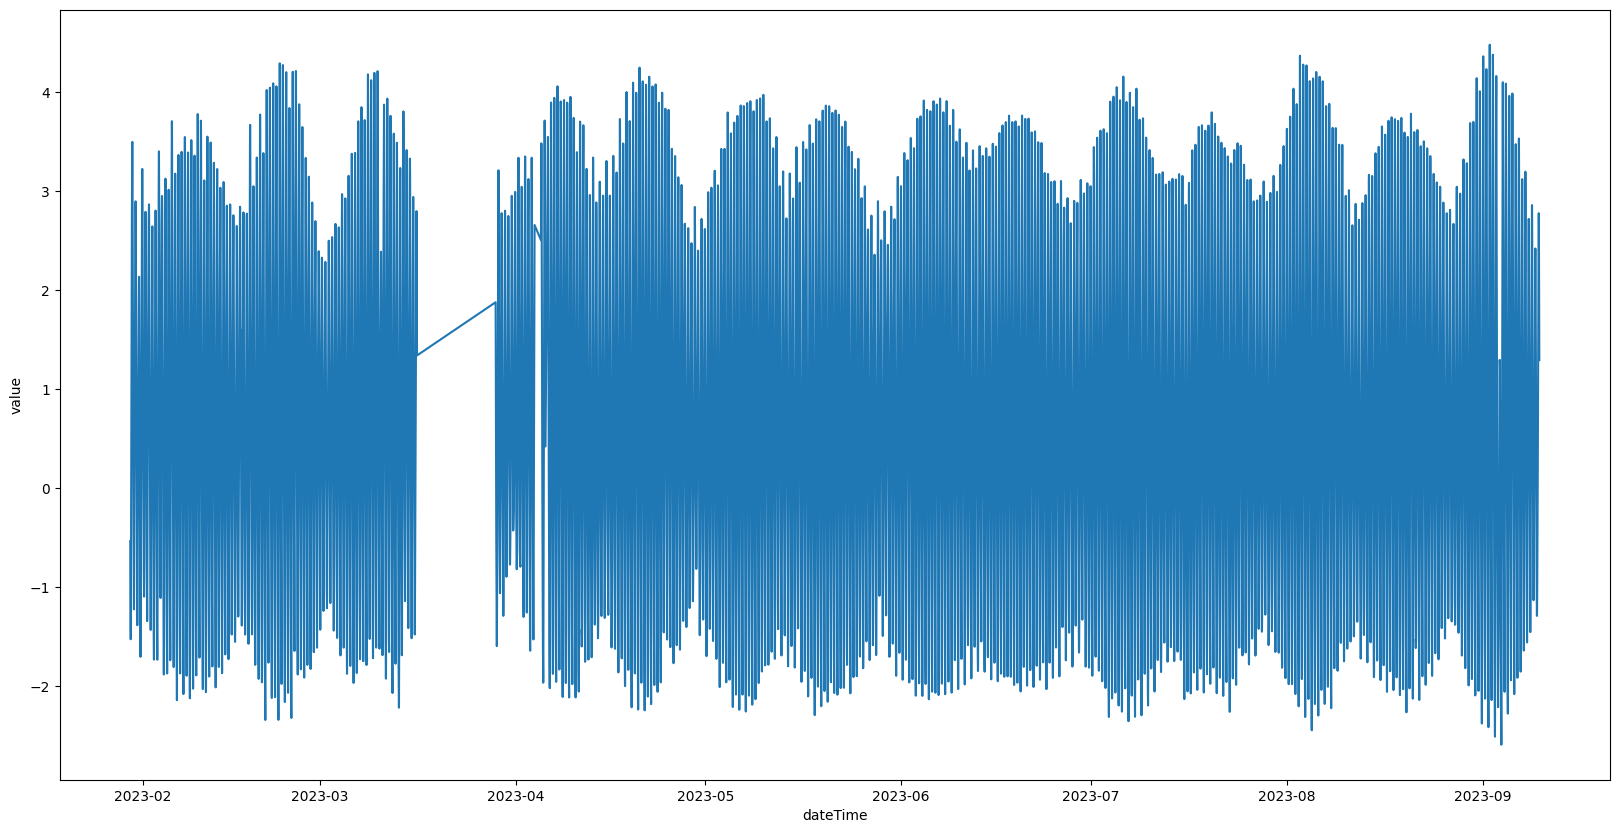

In [ ]:
plt.figure(figsize=(20, 10))

sns.lineplot(data=tides_west_df, x=tides_west_df.index, y="value")

<Axes: >

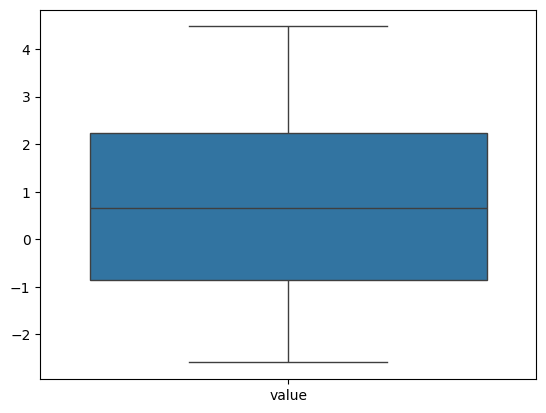

In [ ]:
sns.boxplot(data=tides_west_df)

# Inspect Tower Pier Dataset

In [ ]:
tides_tower_df.set_index("dateTime", inplace=True)
tides_tower_df.sort_index(inplace=True)

In [ ]:
tides_tower_df.drop(columns=["Unnamed: 0", "measure"], inplace=True)

In [ ]:
tides_tower_df["value"] = tides_tower_df["value"].apply(
    lambda x: x.split("|")[0] if isinstance(x, str) and "|" in x else float(x)
)

<Axes: xlabel='dateTime', ylabel='value'>

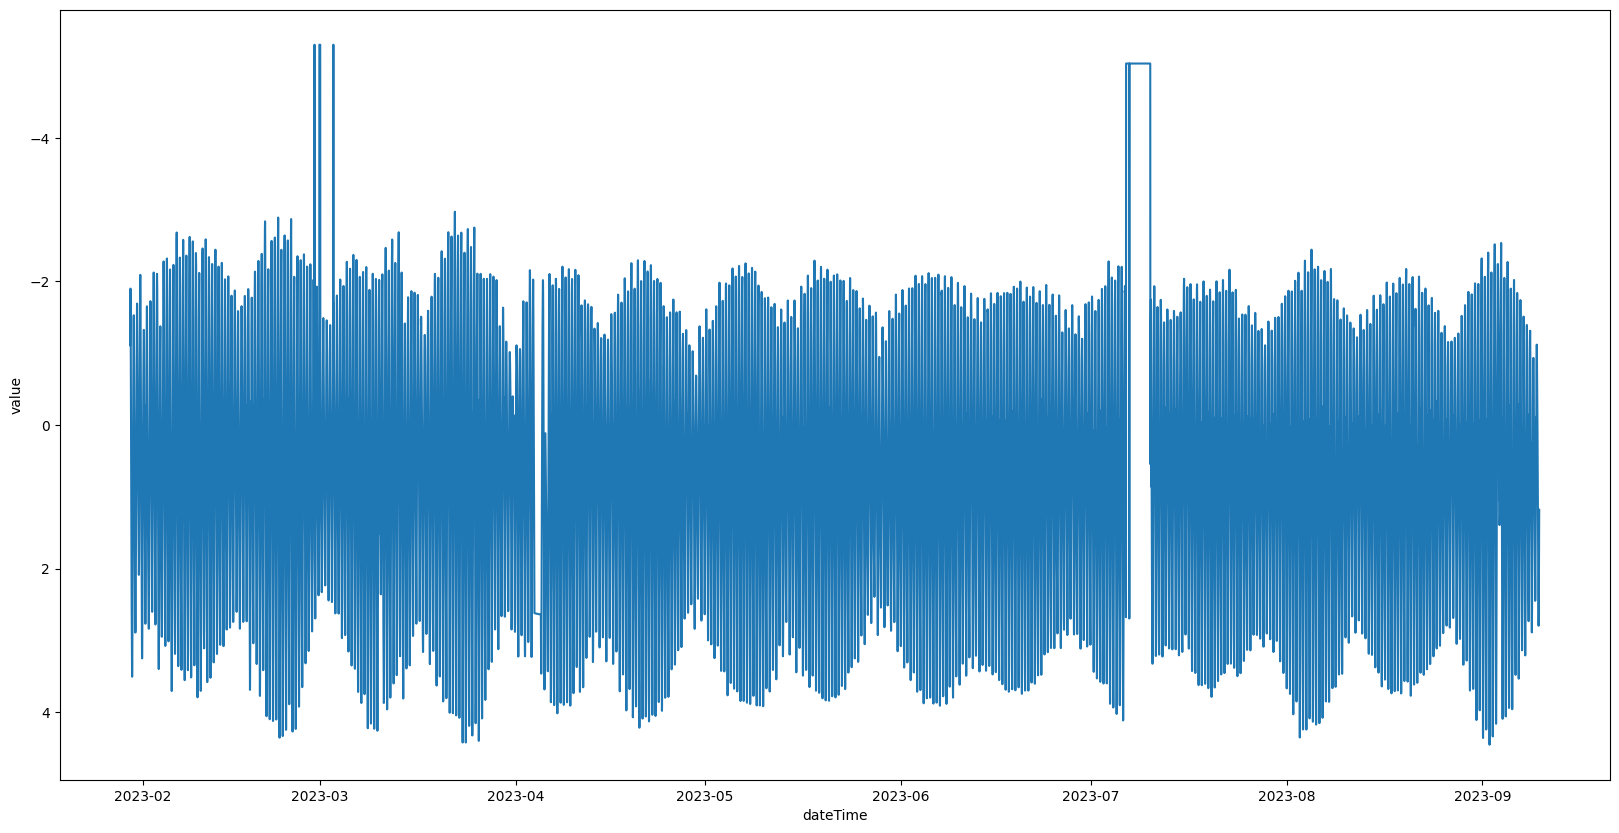

In [ ]:
plt.figure(figsize=(20, 10))

sns.lineplot(data=tides_tower_df, x=tides_tower_df.index, y="value")

## Remove Outliers

In [ ]:
low_quantile_level = 0.01
high_quantile_level = 0.99

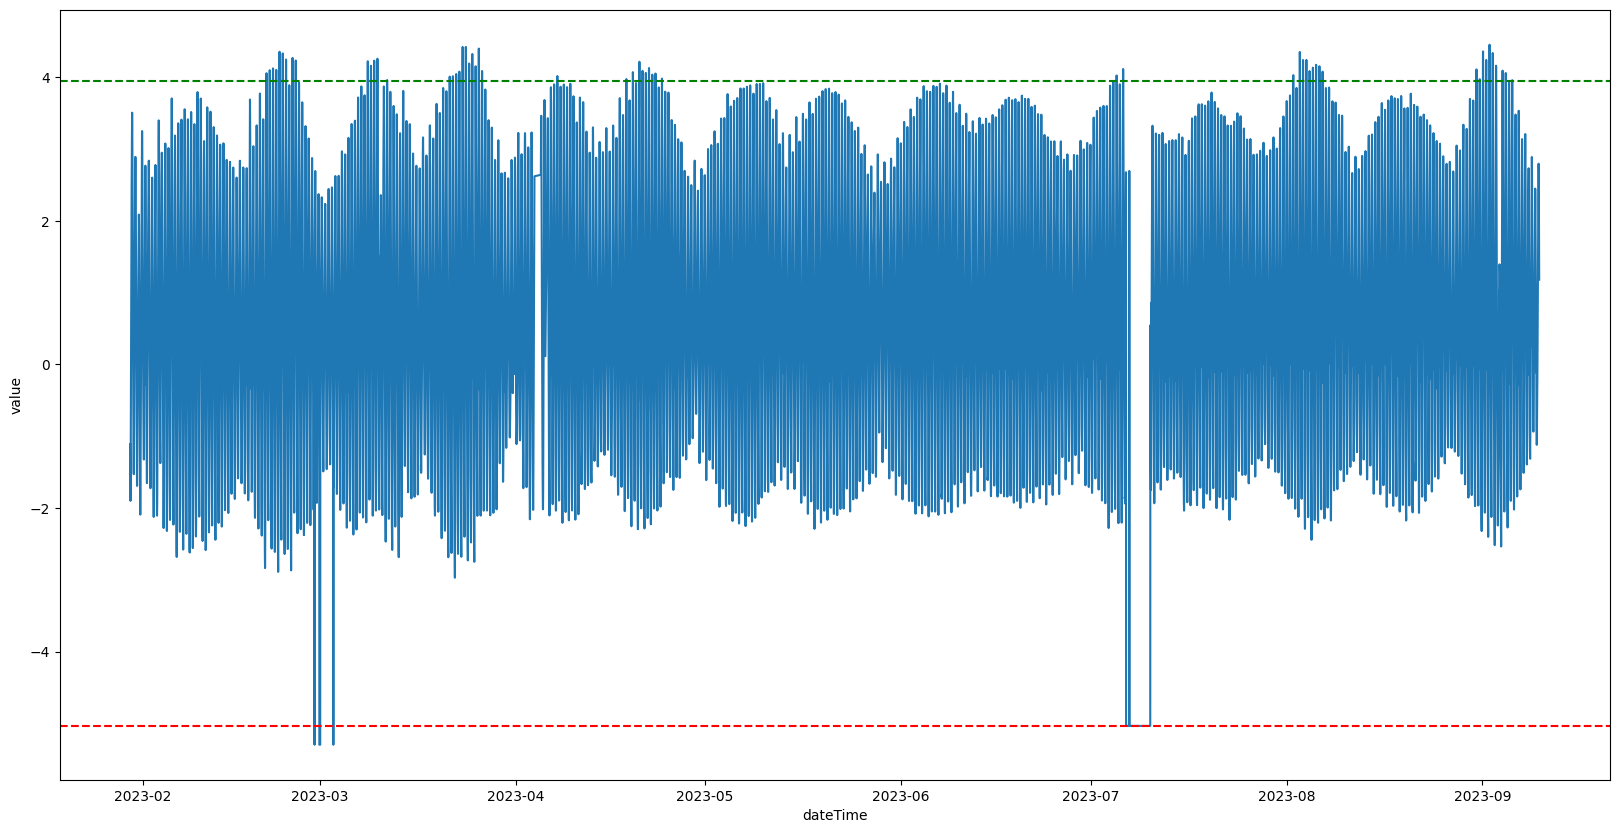

In [ ]:
plt.figure(figsize=(20, 10))

sns.lineplot(data=tides_tower_df, x=tides_tower_df.index, y="value")
plt.axhline(
    tides_tower_df["value"].quantile(low_quantile_level),
    color="red",
    linestyle="--",
    label=f"{low_quantile_level} quantile",
)

plt.axhline(
    tides_tower_df["value"].quantile(high_quantile_level),
    color="green",
    linestyle="--",
    label=f"{high_quantile_level} quantile",
)

In [ ]:
# remove outliers

lower_bound = tides_tower_df["value"].quantile(low_quantile_level)

tides_tower_df["value"] = tides_tower_df["value"].apply(
    lambda x: np.nan if x <= lower_bound else x
)

<Axes: >

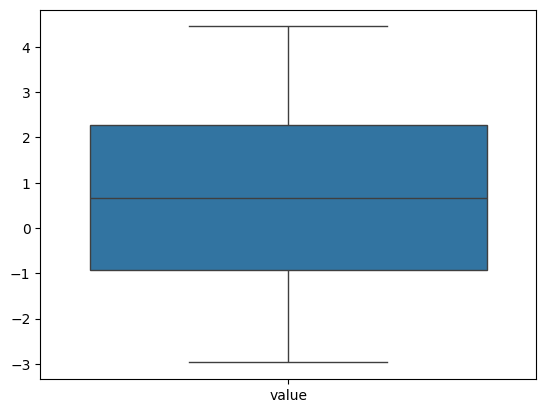

In [ ]:
sns.boxplot(data=tides_tower_df)

<Axes: xlabel='dateTime', ylabel='value'>

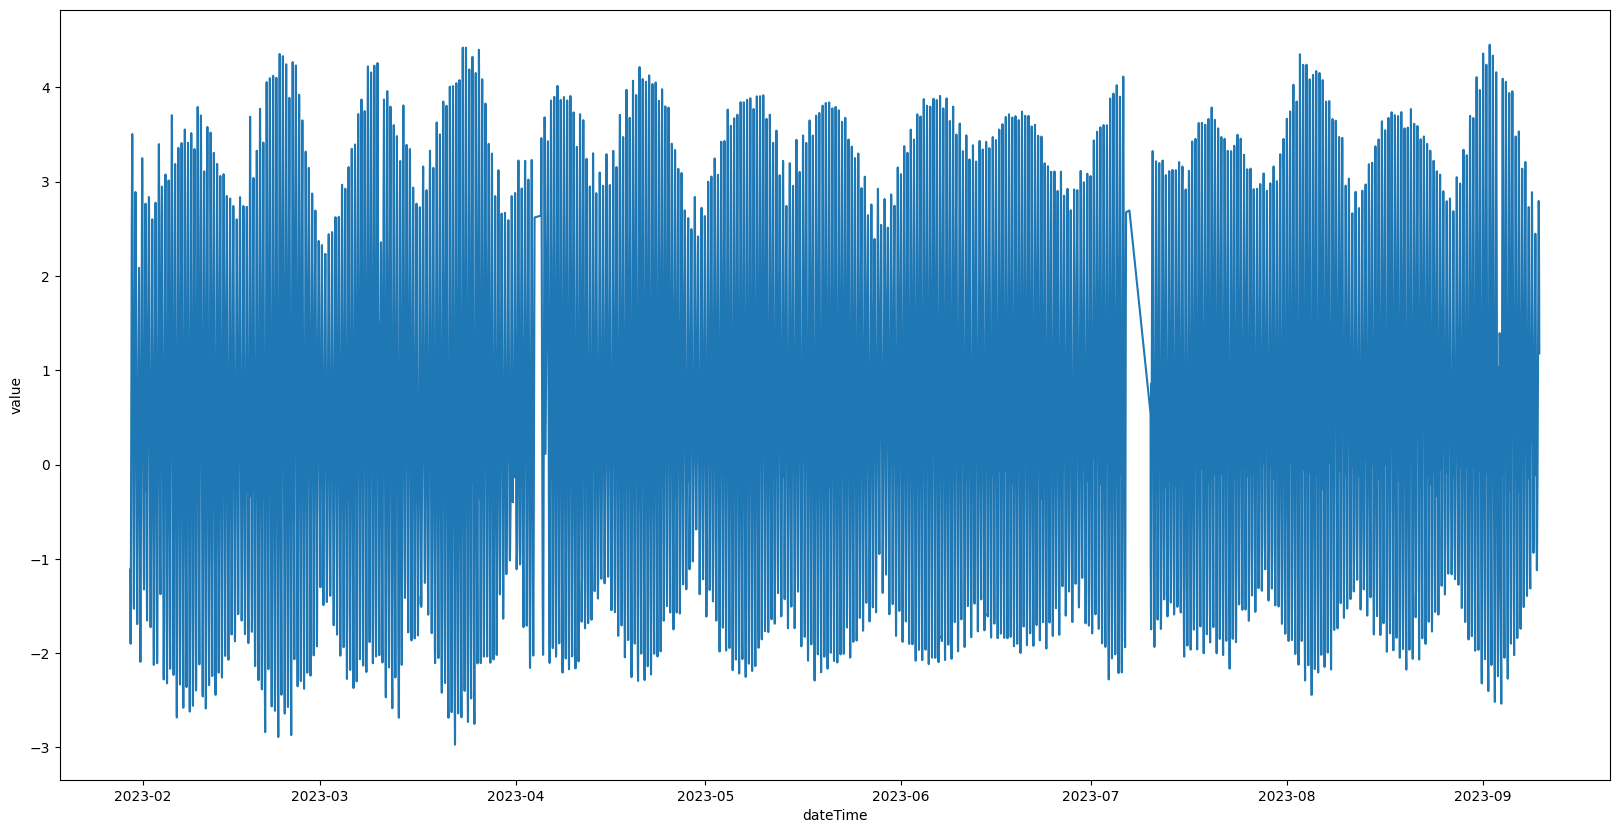

In [ ]:
plt.figure(figsize=(20, 10))

sns.lineplot(data=tides_tower_df, x=tides_tower_df.index, y="value")

# Checkpoint: Store both datasets

In [ ]:
tides_west_df.index = tides_west_df.index.tz_localize(None)
tides_west_df.to_excel(os.path.join(tide_folder, "tides_west.xlsx"))

In [ ]:
tides_tower_df.index = tides_tower_df.index.tz_localize(None)
tides_tower_df.to_excel(os.path.join(tide_folder, "tides_tower.xlsx"))

# Checkpoint: Load both datasets

In [5]:
tides_west_df = pd.read_excel(os.path.join(tide_folder, "tides_west.xlsx"))

In [6]:
tides_tower_df = pd.read_excel(os.path.join(tide_folder, "tides_tower.xlsx"))

(19417.0, 19447.0)

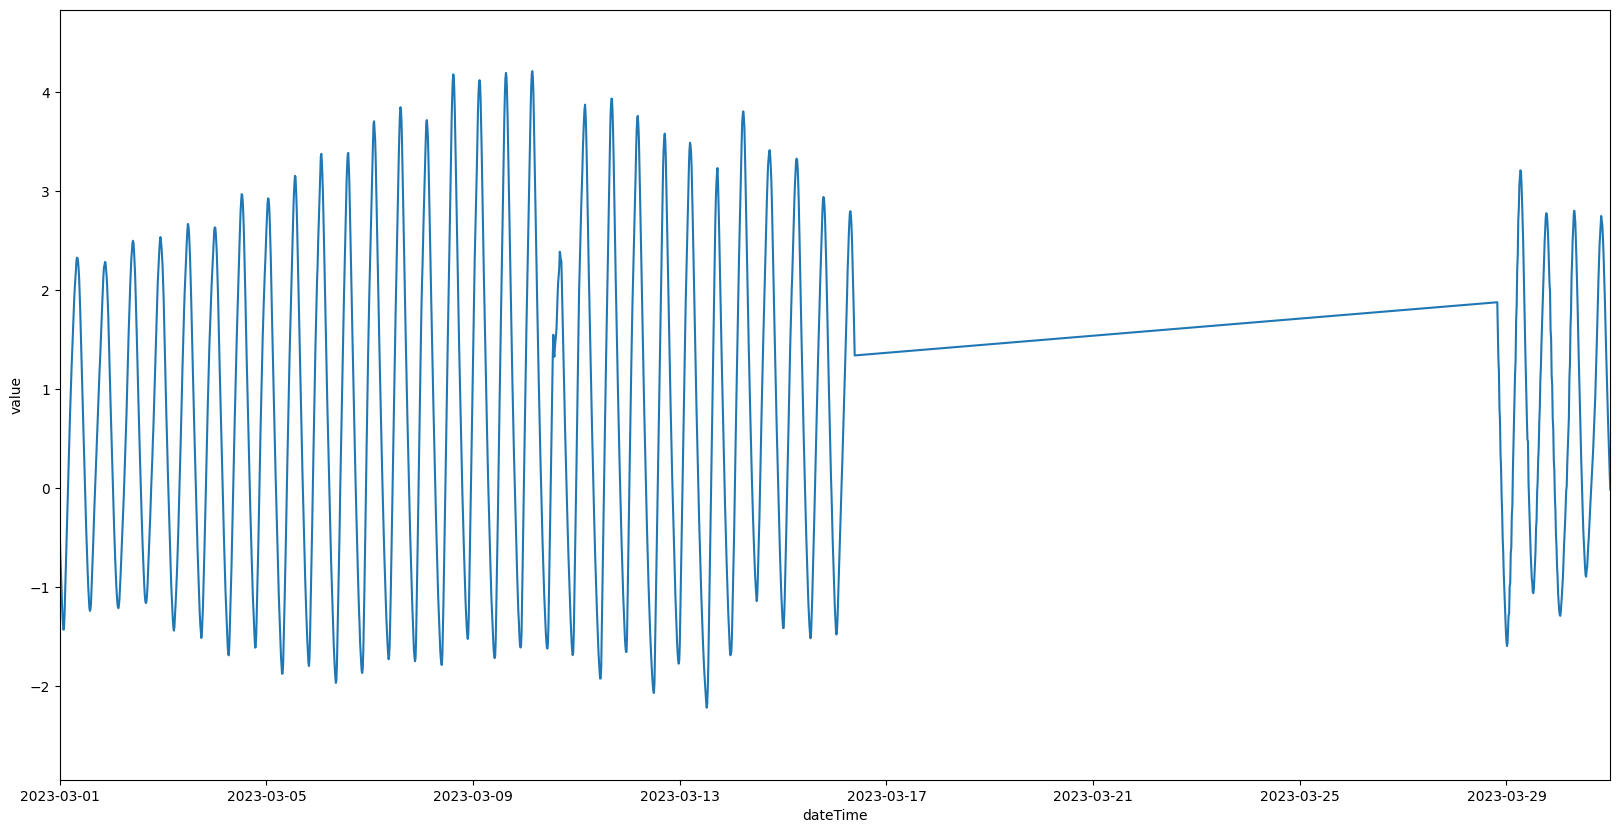

In [22]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=tides_west_df, x="dateTime", y="value")

plt.xlim(pd.Timestamp("2023-03-01"), pd.Timestamp("2023-03-31"))

(19417.0, 19447.0)

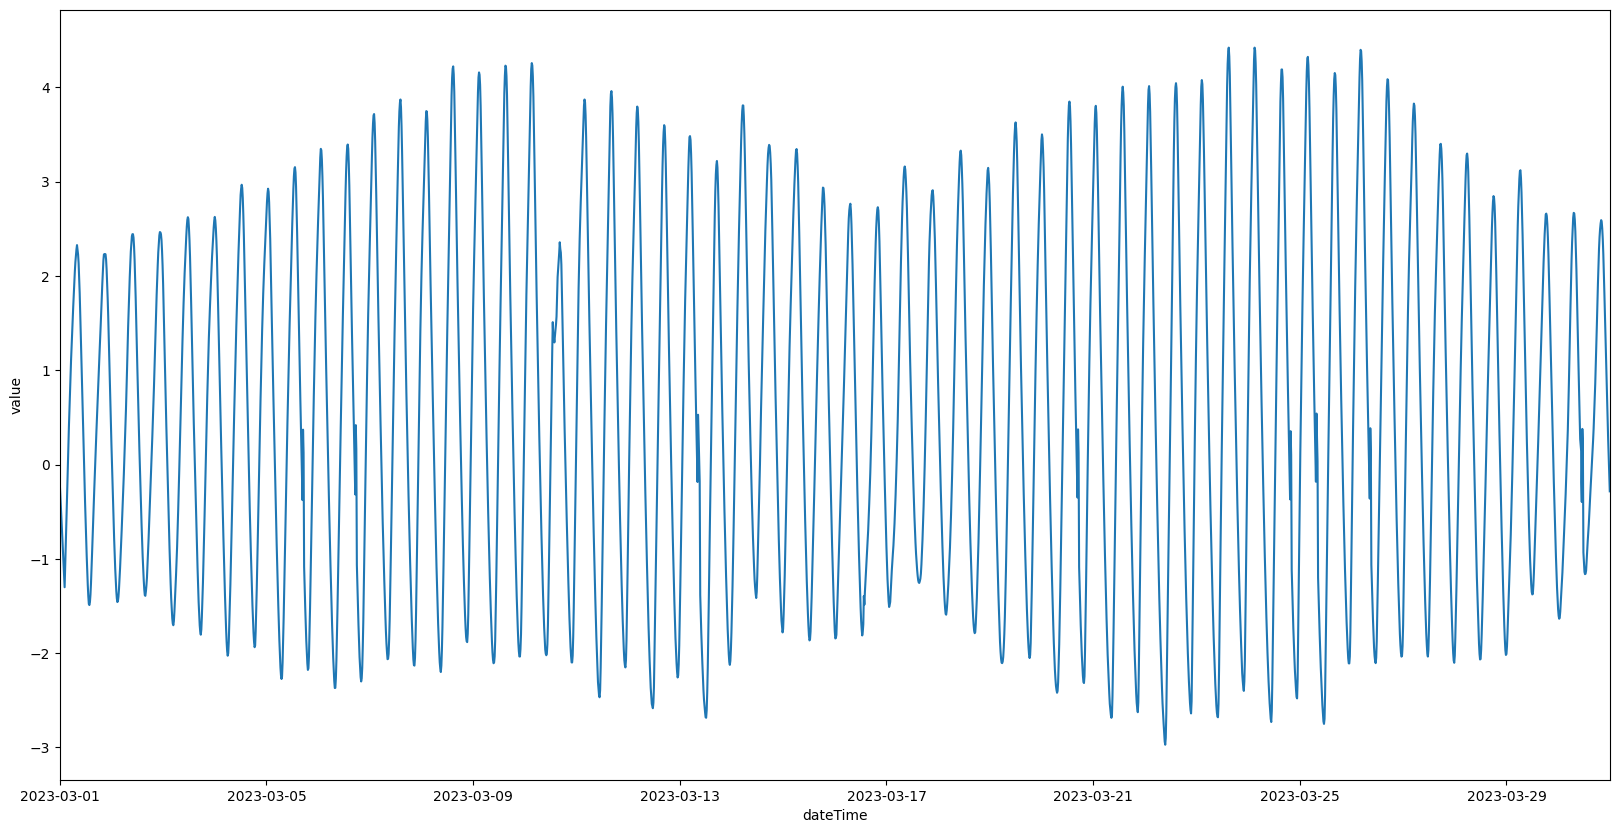

In [23]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=tides_tower_df, x="dateTime", y="value")

plt.xlim(pd.Timestamp("2023-03-01"), pd.Timestamp("2023-03-31"))

# Join Datasets to have more data

In [39]:
# fill tides_west_df with tides_tower_df based on the dateTime column

tides_df = pd.merge(
    tides_west_df,
    tides_tower_df,
    on="dateTime",
    how="outer",
    suffixes=("_west", "_tower"),
)

tides_df["value_west"] = tides_df["value_west"].fillna(tides_df["value_tower"])
tides_df.drop(columns=["value_tower"], inplace=True)
tides_df.rename(columns={"value_west": "value"}, inplace=True)

In [40]:
tides_df.isna().sum()

dateTime    0
value       2
dtype: int64

(19417.0, 19447.0)

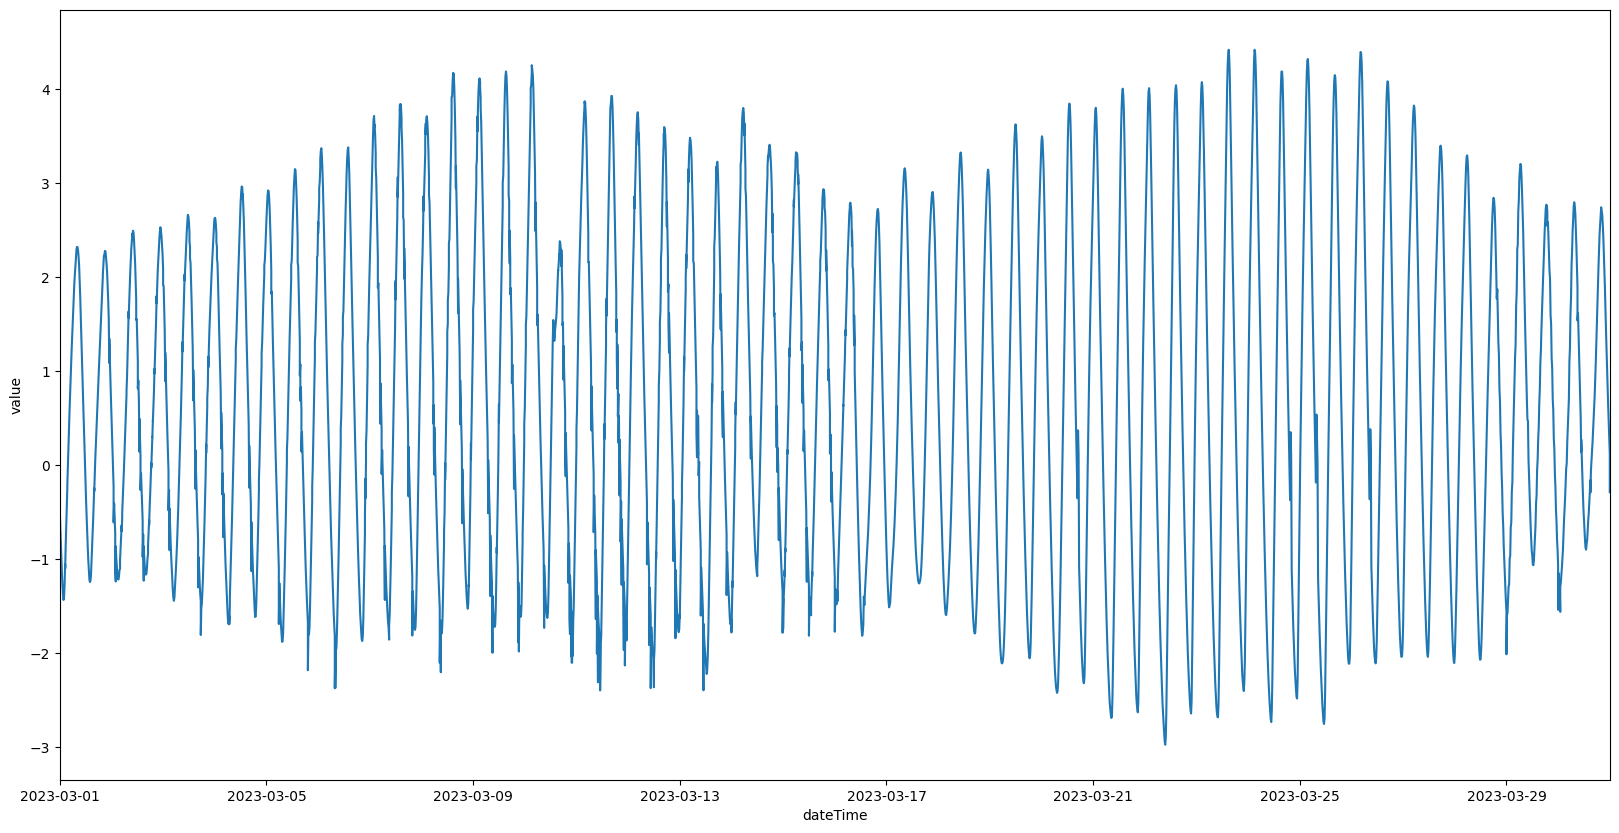

In [41]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=tides_df, x="dateTime", y="value")

plt.xlim(pd.Timestamp("2023-03-01"), pd.Timestamp("2023-03-31"))

In [42]:
tides_df["value"] = tides_df["value"].ffill()

<Axes: xlabel='None', ylabel='value'>

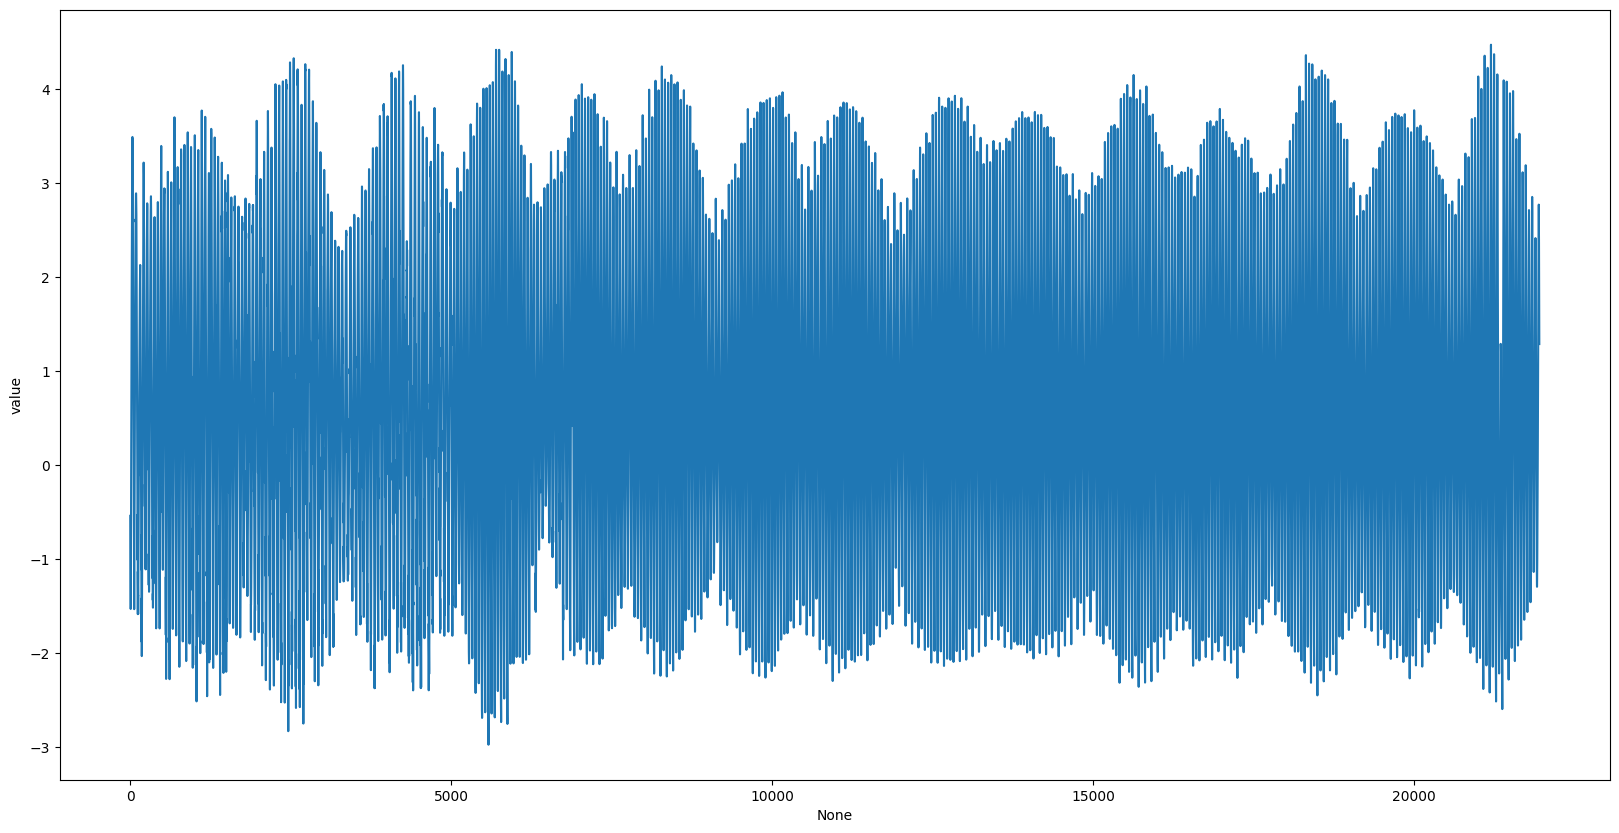

In [43]:
plt.figure(figsize=(20, 10))

sns.lineplot(data=tides_df, x=tides_df.index, y="value")

# Store all data

In [45]:
tides_df.to_excel(os.path.join(tide_folder, "tide_dataset.xlsx"))